In [173]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [174]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [175]:
##load the dataset
df = pd.read_csv("C:/Users/nora_/Downloads/customers (1).csv")
df.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [176]:
#check the type of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [177]:
#check if there are values missing
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [178]:
# fill missing values in Ever_Married, Graduated, and Profession with Mode (i.e. most common answer)
df['Ever_Married'] = df['Ever_Married'].fillna(df['Ever_Married'].mode()[0])
df['Graduated'] = df['Graduated'].fillna(df['Graduated'].mode()[0])
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])


# fill missing values in Work_Experience and Family_Size with median
df['Work_Experience'] = df['Work_Experience'].fillna(df['Work_Experience'].median())
df['Family_Size'] = df['Family_Size'].fillna(df['Family_Size'].median())

In [179]:
## change object data for Gender, Ever_Married, Graduated, Profession, Spending Score, Var_1 to numerical value

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Ever_Married'] = df['Ever_Married'].map({'No': 0, 'Yes': 1})
df['Graduated'] = df['Graduated'].map({'No': 0, 'Yes': 1})
df['Profession'] = df['Profession'].astype('category').cat.codes 
df['Spending_Score'] = df['Spending_Score'].map({'Low': 0, 'Average': 1, 'High': 2})
print(df.head())

       ID  Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0  458989       1             1   36          1           2              0.0   
1  458994       0             1   37          1           5              8.0   
2  458996       1             1   69          0           0              0.0   
3  459000       0             1   59          0           4             11.0   
4  459001       1             0   19          0           8              1.0   

   Spending_Score  Family_Size  Var_1  
0               0          1.0  Cat_6  
1               1          4.0  Cat_6  
2               0          1.0  Cat_6  
3               2          2.0  Cat_6  
4               0          4.0  Cat_6  


In [180]:
print(df.columns)


Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')


In [181]:
# drop ID and Var_1

df.drop(columns=['ID'], inplace=True)
df.drop(columns=['Var_1'], inplace=True)

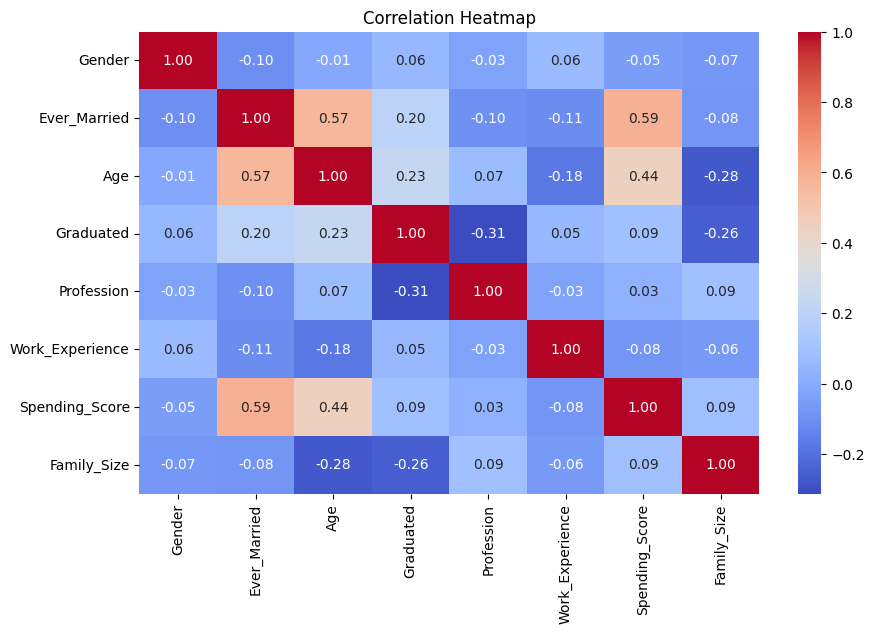

In [182]:
# compute the correlation matrix to demonstrate how strong the numerical variables are related to each other
correlation_matrix = df.corr()

# generate a correlation heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

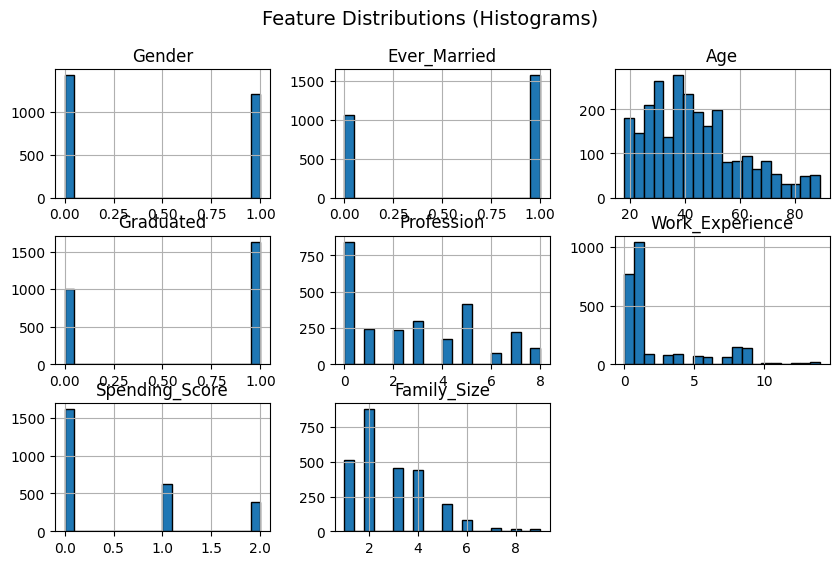

In [183]:
# generate histograms for numerical features
df.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions (Histograms)", fontsize=14)
plt.show()


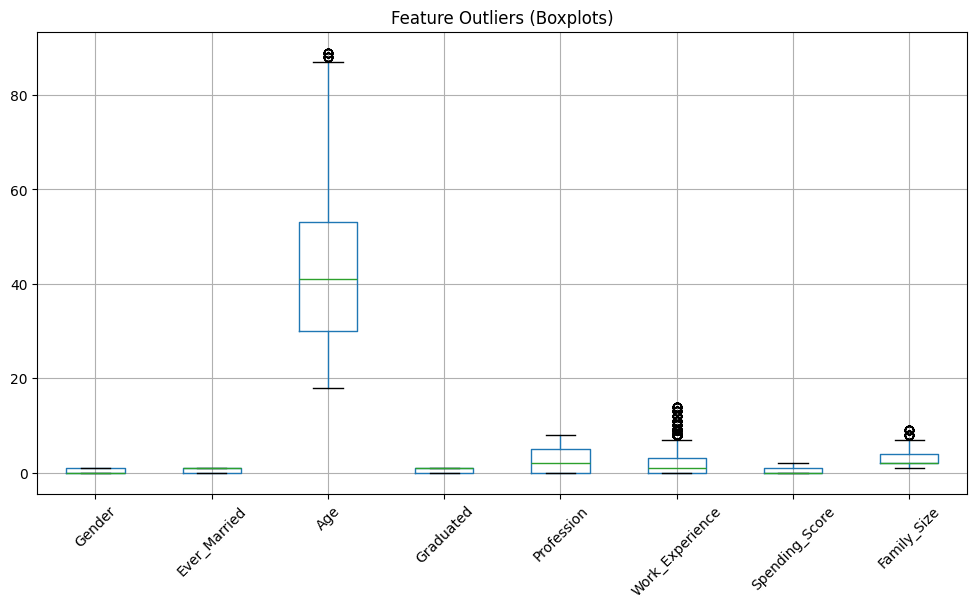

In [184]:
# generate boxplots for numerical features
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)  # Rotate labels for better readability
plt.title("Feature Outliers (Boxplots)")
plt.show()


In [185]:
# scale data as some numerical values too far apart
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [186]:
## finding the k value
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

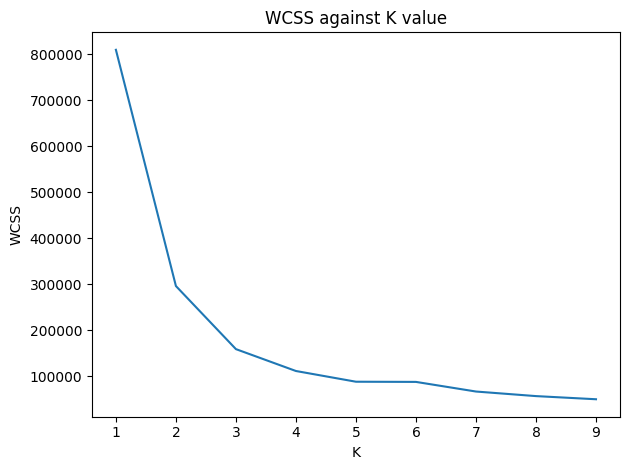

In [187]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng, sse)
plt.title('WCSS against K value')
plt.tight_layout()

In [188]:
## use the cluster to be 3
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([0, 1, 2, ..., 1, 1, 1], shape=(2627,), dtype=int32)

In [189]:
## put the cluster into the dataframe
df['Cluster'] = y_predicted

df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Cluster
0,1,1,36,1,2,0.0,0,1.0,0
1,0,1,37,1,5,8.0,1,4.0,1
2,1,1,69,0,0,0.0,0,1.0,2
3,0,1,59,0,4,11.0,2,2.0,2
4,1,0,19,0,8,1.0,0,4.0,0
...,...,...,...,...,...,...,...,...,...
2622,0,0,29,0,5,9.0,0,4.0,0
2623,1,0,35,1,1,1.0,0,1.0,0
2624,1,0,53,1,3,1.0,0,2.0,1
2625,0,1,47,1,4,1.0,2,5.0,1


In [190]:
## centroid
km.cluster_centers_

array([[ 0.46343874,  0.24901186, 27.70355731,  0.43577075,  3.38241107,
         2.84090909,  0.16600791,  3.25395257],
       [ 0.46886447,  0.74908425, 45.40659341,  0.76007326,  1.71062271,
         2.51007326,  0.64652015,  2.62912088],
       [ 0.42447419,  0.95602294, 70.8374761 ,  0.67877629,  3.91395793,
         1.28489484,  1.        ,  2.22753346]])

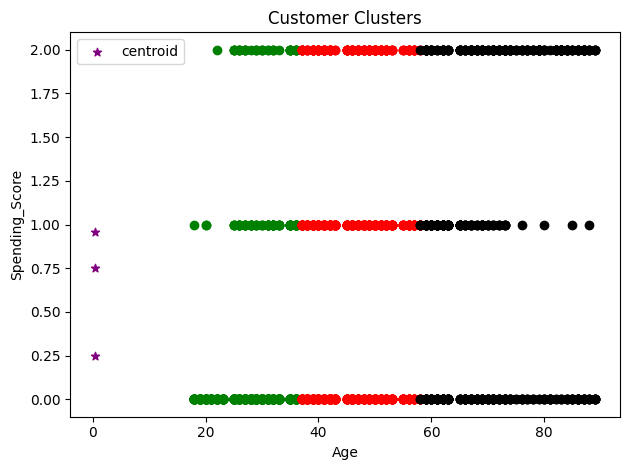

In [193]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1['Age'], df1['Spending_Score'], color = 'green')
plt.scatter(df2['Age'], df2['Spending_Score'], color = 'red')
plt.scatter(df3['Age'], df3['Spending_Score'], color = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='*', label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Spending_Score')
plt.legend()
plt.title('Customer Clusters')
plt.tight_layout()

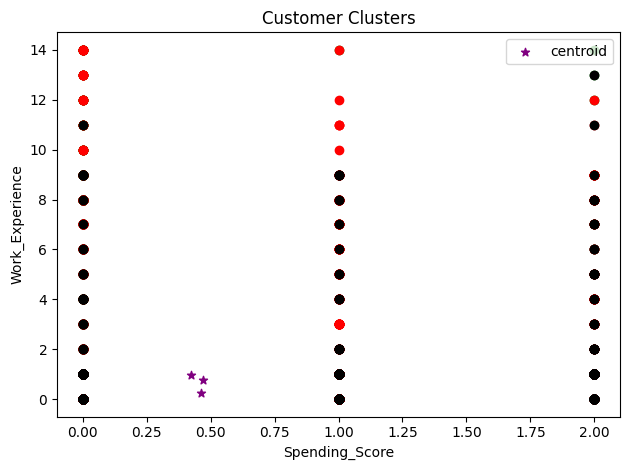

In [198]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1['Spending_Score'], df1['Work_Experience'], color = 'green')
plt.scatter(df2['Spending_Score'], df2['Work_Experience'], color = 'red')
plt.scatter(df3['Spending_Score'], df3['Work_Experience'], color = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='*', label = 'centroid')
plt.xlabel('Spending_Score')
plt.ylabel('Work_Experience')
plt.legend()
plt.title('Customer Clusters')
plt.tight_layout()

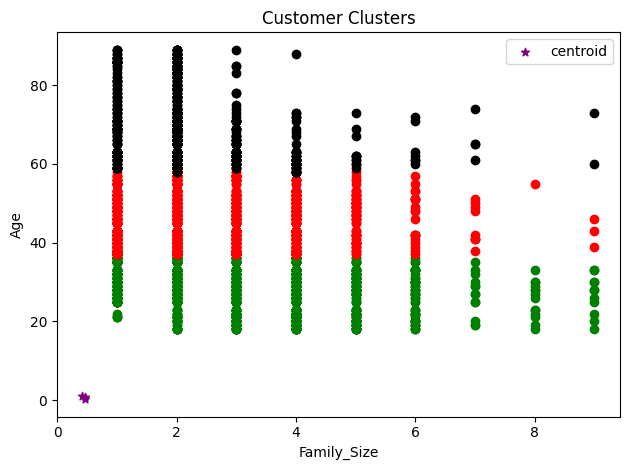

In [197]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1['Family_Size'], df1['Age'], color = 'green')
plt.scatter(df2['Family_Size'], df2['Age'], color = 'red')
plt.scatter(df3['Family_Size'], df3['Age'], color = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='*', label = 'centroid')
plt.xlabel('Family_Size')
plt.ylabel('Age')
plt.legend()
plt.title('Customer Clusters')
plt.tight_layout()